# Cyber Crime Awareness in Saudi Arabia
##### Group Members:
    Ahmed Altowairqi
    Mohammed Albesher
    Abdulrahman Aljubaylan
    Abdullah Albutih
    Raghad Almeataz

### Business Statement 
<img src='intro image.png' width="800" style="align:middle"/>

### Project Objective
    Measure Awareness
    Determine factors for becoming a victim

### Dataset Overview 
    Survey
    64 questions
    1230 respondants
    
### Predicted Label 
    [Factors] ---> Model ---> Victim, Not Victim



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from data_des import data_des
warnings.filterwarnings('ignore')

In [2]:
# create names_list to save cols names , and assign it to the Df
names_list =[]
for key in data_des:
    names_list.append(key)
    
# read the data with names_list 
df = pd.read_excel("data/Dataset.xlsx",names=names_list  )
df

,gender,age,education,major,regions,eservice_usage,device_skill_level,freq_used,connection_type,used_purpose,...,education_responsible,other_responsible,government_role,victim,when_being_victim,contact_to_victim,not_victim,not_victim_would_like_to_report,not_victim_aggree_to_report,not_victim_not_aggree_to_report
0,Female,18-29,"Postgraduate (Master’s, PhD)",Computer Science,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone",Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,Strongly Agree,NaN,No role,Yes,No,NaN,I think that there is no value of reporting,"No, I would not",NaN,I do not know what the crime means
1,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,"Private Wi-Fi (e.g. in your home), Mobile/cell...","Social networks, Communication",...,Agree,NaN,Monitor organisations misusing consumer inform...,No,NaN,NaN,NaN,"Yes, I would","Saudi eGovernment Portal , Saudi CERT",NaN
2,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Tablet,Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,Yes,Yes,Bank,NaN,"No, I would not",NaN,Not sure
3,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone","Public Wi-Fi (e.g. in coffee shop), Private Wi...","Professional reasons, Education, Social networ...",...,Disagree,NaN,Don’t know,No,NaN,NaN,NaN,"No, I would not",NaN,Not sure
4,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone","Private Wi-Fi (e.g. in your home), Mobile/cell...","Education, Social networks, Online services, E...",...,Strongly Agree,NaN,No role,Yes,No,NaN,I did not know how to describe or write report...,"No, I would not",NaN,I will fix the problem by myself
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,"Beginner/Basic (e.g. start computer and phone,...",Smartphone,Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, ...",...,Agree,NaN,Work towards providing a global cyber security...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN
1227,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone",Mobile/cellular phone network (e.g. 3G/4G),"Professional reasons , Education, Social ne...",...,Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN
1228,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,Mobile/cellular phone network (e.g. 3G/4G),"Social networks , Online services , Entertainment",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Police,NaN
1229,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,"Mobile/cellular phone network (e.g. 3G/4G), Pr...","Social networks , Online services, Entertainme...",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN


### Data Cleaning 

In [3]:
# see the number of missing values, we have 7164
df.isna().sum().sum()

7164

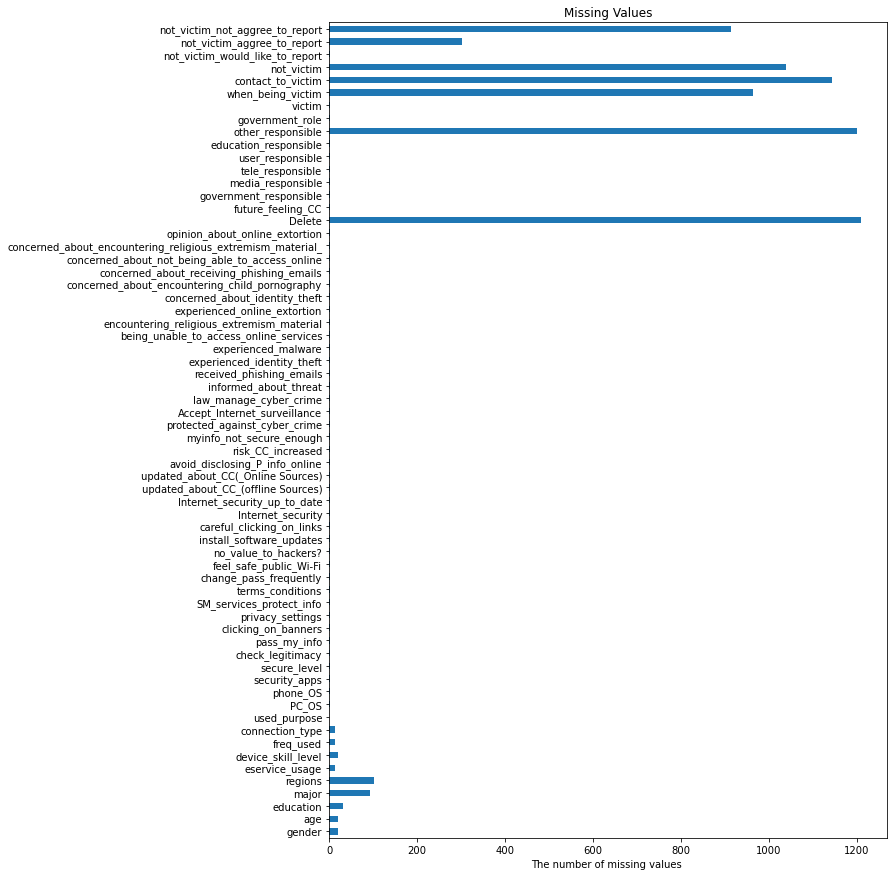

In [4]:
plt.subplots(figsize=(10,15))
df.isnull().sum().plot(
    kind="barh"
)

plt.title("Missing Values")
plt.xlabel("The number of missing values ") # x axis label
plt.show()

In [5]:
#we will drop the columns that with 60% missing values and more , because they do not have enough data
# 60*1231 =>  73860 / 100 => 739
# from 64 => 58 cols 
df = df.loc[:,df.isna().sum() < 739]
df.shape

(1231, 58)

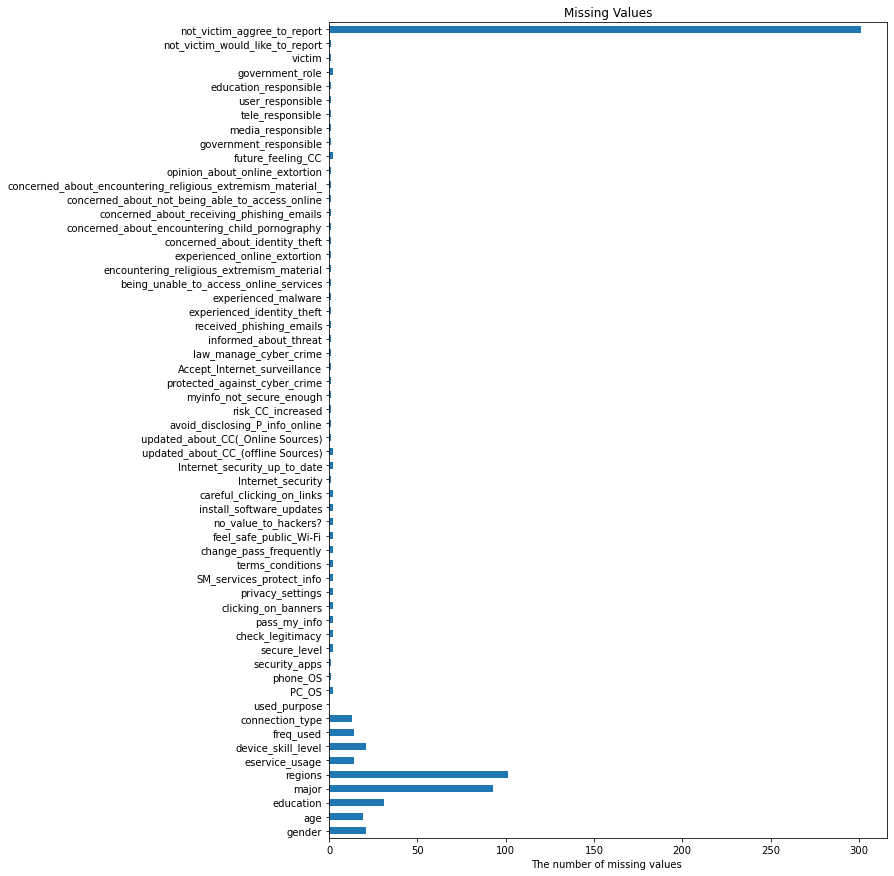

In [6]:
# we can check the plot again 
plt.subplots(figsize=(10,15))
df.isnull().sum().plot(
    kind="barh"
)

plt.title("Missing Values")
plt.xlabel("The number of missing values ") # x axis label
plt.show()

In [7]:
# here because not_victim_aggree_to_report is a part of previous question 
# Also, has so many missing value that near from 60% , so we diced to delete it 
del df["not_victim_aggree_to_report"]
df.shape

(1231, 57)

In [8]:
# here to see the columns types to see the distiribution to fill the missing values 
# we see all of them are object type
df.dtypes

gender                                                        object
age                                                           object
education                                                     object
major                                                         object
regions                                                       object
eservice_usage                                                object
device_skill_level                                            object
freq_used                                                     object
connection_type                                               object
used_purpose                                                  object
PC_OS                                                         object
phone_OS                                                      object
security_apps                                                 object
secure_level                                                  object
check_legitimacy                  

In [9]:
# Here to take the each column and present the graph 
def graph_distiribution(column_name , fill_or_not):
    plt.subplots(figsize=(10,8))
    
    df[column_name].value_counts().plot(
    kind="bar"
    )
    plt.title(f"{x} Distiribution {fill_or_not} Fill")
    plt.xlabel(f"{x} Values ") # x axis label
    
    

In [10]:
# this for the distiribution &
# see the missing values before and after fill

for x in df.isna().columns:
    
    #graph before fill
    #graph_distiribution(x,"Before")
    # here to fill each one of them with the mode 
    df[x].fillna(df[x].mode()[0], inplace=True)
    # graph after fill
    #graph_distiribution(x,"After")

    

In [11]:
# no we fill all the missing values 
df.isna().sum().sum()

0

In [12]:
# check the santy checks , data entry error
#for x in df:
    #print(df[x].value_counts())

In [13]:
# from above we can see , we have many trouble with whitespaces 
# espacillay with the following cols. 

# df["education"].value_counts()
# df["major"].value_counts()
# df["freq_used"].value_counts()
# df["phone_OS"].value_counts()

# so , reomve whitespaces from start and end each word or sentence in every column 

# remove whitespaces
for x in df:
    df[x] = df[x].str.strip()  


In [14]:
# No here we have no data entry for some values in 
df["major"].value_counts()
df["education"].value_counts()

Undergraduate (Diploma, BSc)    882
Postgraduate (Master’s, PhD)    192
High School                     152
Middle School                     3
                                  2
Name: education, dtype: int64

In [15]:
# so , to deal with it , we fill it with the mode
df['education'] = df['education'].replace('', np.nan).fillna(df['education'].mode()[0])
df['major'] = df['major'].replace('', np.nan).fillna(df['major'].mode()[0])

In [16]:
#besline 
df["victim"].value_counts(normalize=True)

No     0.783103
Yes    0.216897
Name: victim, dtype: float64

### ---------- Insight 1 ----------
#### Who is mostly using the internet? 
#### Which age group in both genders are more likely to be a victim? 

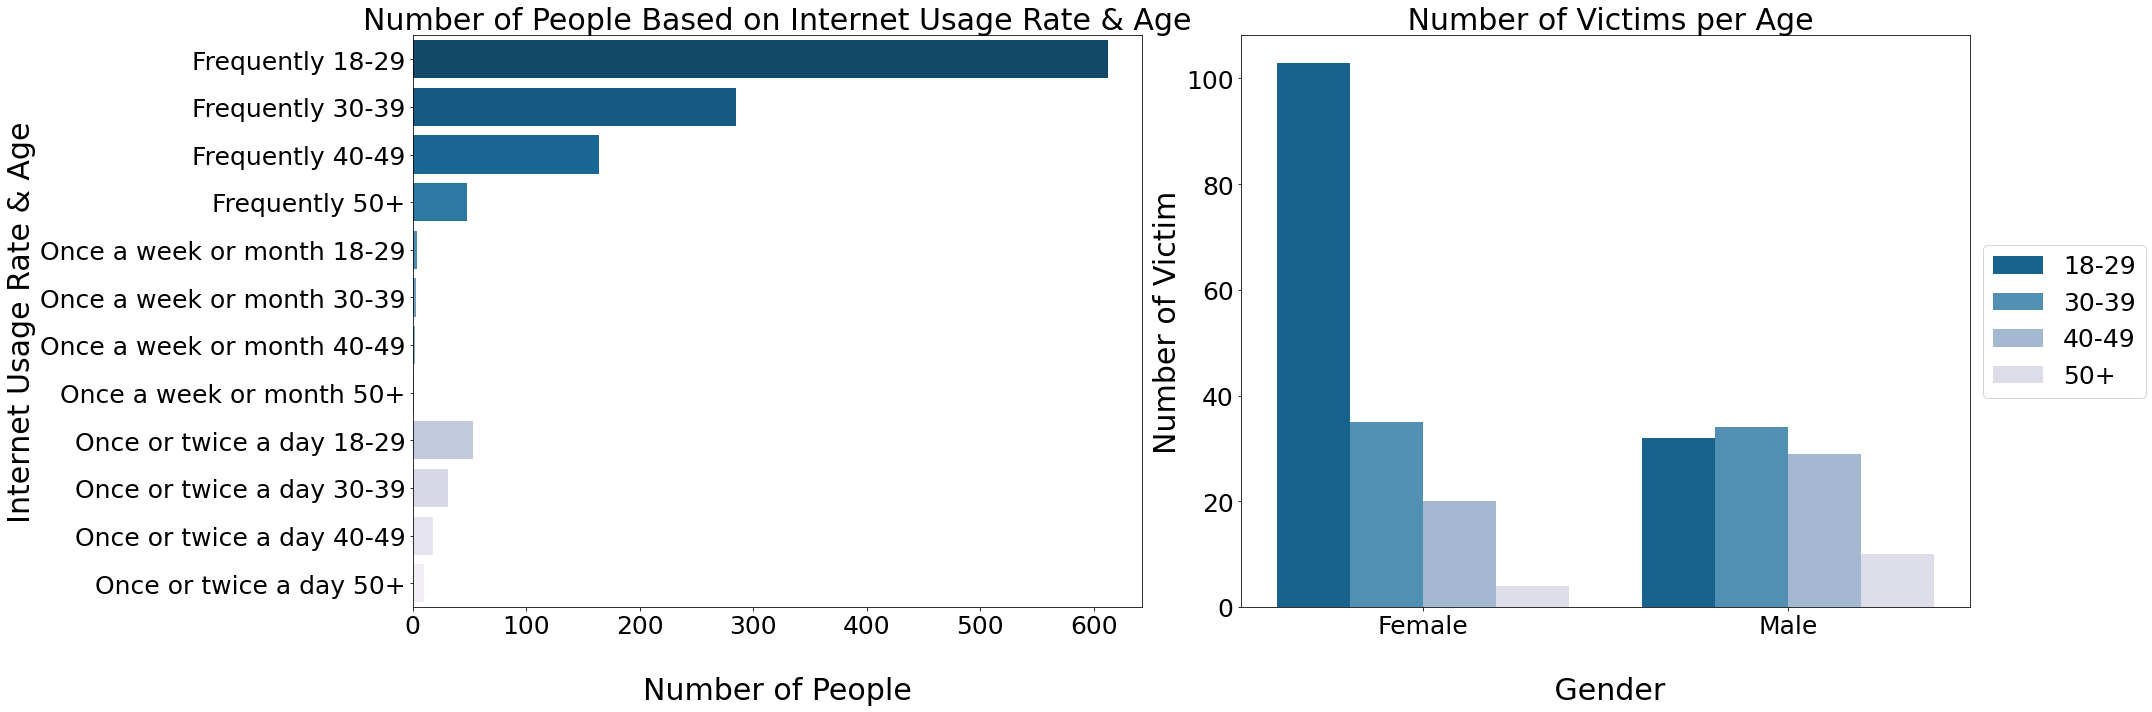

In [17]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
# Plot 
peopleUsageRate = df.groupby('eservice_usage')['age'].value_counts()

y = ["Frequently 18-29","Frequently 30-39","Frequently 40-49","Frequently 50+",
    "Once a week or month 18-29","Once a week or month 30-39","Once a week or month 40-49","Once a week or month 50+",
    "Once or twice a day 18-29","Once or twice a day 30-39","Once or twice a day 40-49","Once or twice a day 50+"]

b=sns.barplot(ax=ax[0],data = df,x = peopleUsageRate.values,y = y ,alpha = 1,palette= sns.color_palette("PuBu_r",12))
b.set_title("Number of People Based on Internet Usage Rate & Age", size=30, y=1)
b.set_xlabel('\nNumber of People',fontsize='30', horizontalalignment='center')
b.set_ylabel("Internet Usage Rate & Age",fontsize='30', horizontalalignment='center')
b.tick_params(axis='both', labelsize=25)
#plot 2
# condition that shows only people who have been victim of cybercrime
condition = (df["victim"] == 'Yes')
df_victim_yes=df[condition][:]
df_age=df_victim_yes.groupby(["gender","age"])[["major"]].count()
dfa=df_age.reset_index()
# plot shows the number of victim in terms of age 
a= sns.barplot(x="gender", y="major", hue="age", data=dfa,palette=sns.color_palette("PuBu_r",4),alpha=1)
a.set_title(' Number of Victims per Age', size=30, y=1)
a.set_xlabel('\n Gender', fontsize='30', horizontalalignment='center')
a.set_ylabel('Number of Victim', fontsize='30', horizontalalignment='center')
a.tick_params(axis='both', labelsize=25)
a.legend(loc='center left',bbox_to_anchor=[1,0.5],fontsize=25)
fig.tight_layout()
plt.show()


In [18]:
# here take the students that have been victim
# then take the gender and eudaction 
df_edu = df[df["victim"] == "Yes"]
df_edu = df_edu[["gender","age","education"]]
#group them by 
df_edu_ = df_edu.groupby(["education"]).gender.value_counts().reset_index(name ='Count')

### ---------- Insight 2 ----------
#### Which education level and gender is more likely to be victims? 


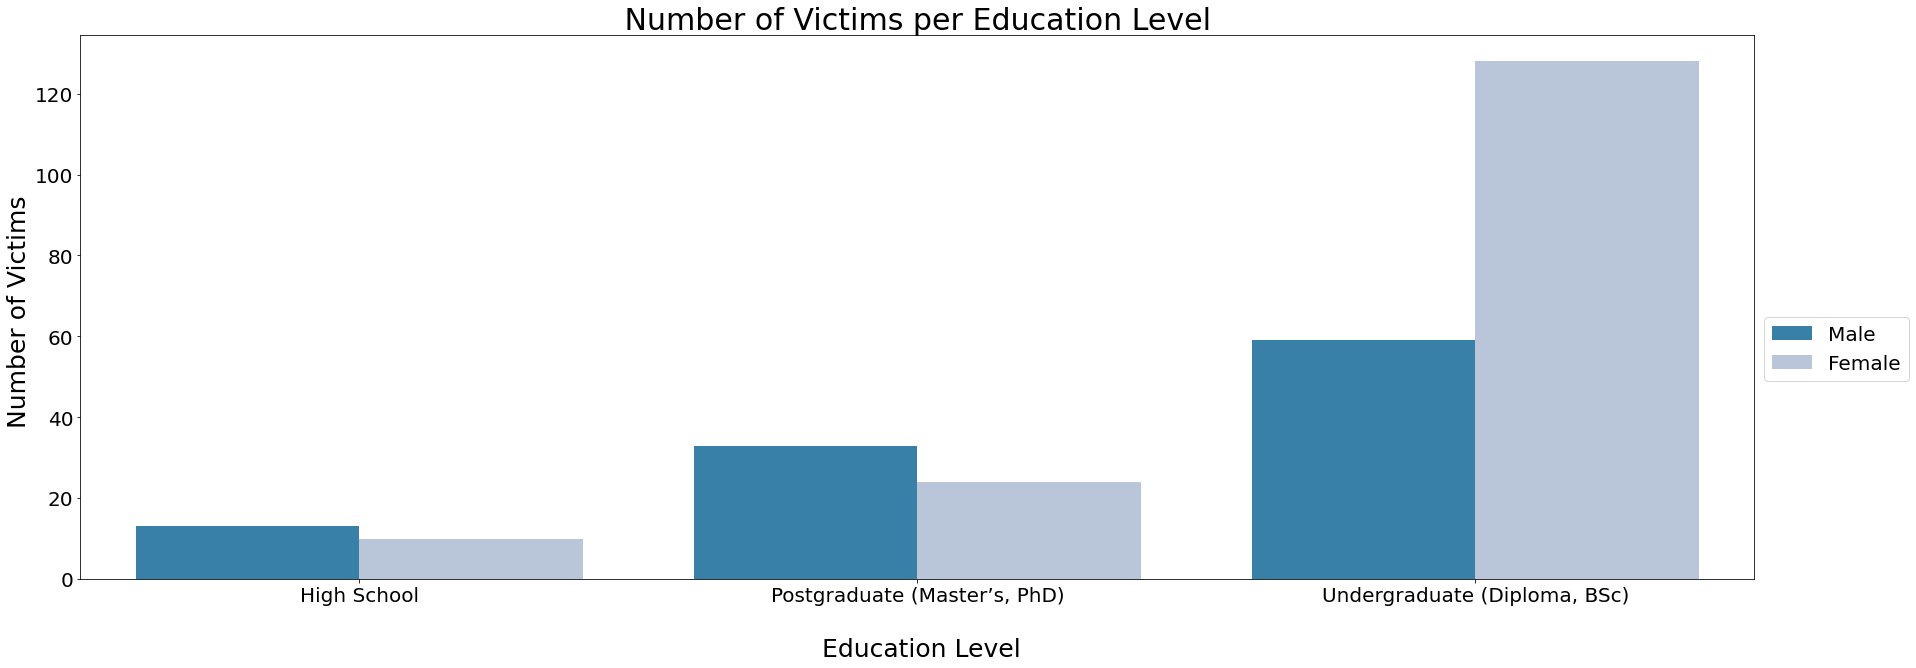

In [19]:
#plot 3
plt.figure(figsize = (30,10))
sns.barplot(
    data = df_edu_,
    x="education", 
    y="Count",
    hue="gender",
    palette=sns.color_palette("PuBu_r",2),alpha=1
    
)
plt.title(' Number of Victims per Education Level ', fontsize=30)
plt.xlabel("\n Education Level", fontsize='25', horizontalalignment='center')
plt.ylabel('Number of Victims ', fontsize='25', horizontalalignment='center')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(bbox_to_anchor=[1,0.5],fontsize=20)
plt.show()